<h1 style="color: #bf0e23  ">Airline_passenger_referal_prediction</h1>
 <h2 style="color: #590ebf">Project Type - Classification/Supervised Machine Learning</h2>
 <h3 style="color:#0ebf26"> Contribution - Individual</h3>

<h2 style="color: #bf0e23 " > Data Description</h2>

<h3 style="color: #590ebf">Data includes airline reviews from 2006 to 2019 for popular airlines around the world withmultiple choice and 
free text questions. Data is scraped in Spring 2019. 
The main objectiveis to predict whether passengers will refer the airline to their friends.</h3>

<h3 style="color: #bf0e23 ">Feature descriptions briefly as follows:</h3>

<b>airline:</b> Name of the airline.

<b>overall:</b> Overall point is given to the trip between 1 to 10.

<b>author:</b> Author of the trip

<b><b>review date: </b>Date of the Review

<b>customer review:</b>Review of the customers in free text format

<b>aircraft:</b> Type of the aircraft

<b>traveller type: </b>Type of traveler (e.g. business, leisure)

<b>cabin:</b> Cabin at the flight date flown: Flight date

<b>seat comfort:</b> Rated between 1-5

<b>cabin service:</b> Rated between 1-5

<b>foodbev:</b> Rated between 1-5

<b>entertainment:</b> Rated between 1-5

<b>ground service:</b> Rated between 1-5

<b>value for money:</b> Rated between 1-5

<b>recommended:</b> Binary, target variable.



<h2 style="color: #bf0e23  ">Objective</h2>

<b>The main objective is to predict whether passengers will refer the airline to their family or friends.</b>


In [1]:
#import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:


# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score
     


In [3]:
path='C://Users/Ghani/Downloads/data_airline_reviews.xlsx'
df=pd.read_excel(path)

### Understand More About The Data

In [4]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(131895, 17)

In [6]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [8]:

#Checking the unique values of the recommended column(target variable)
df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [9]:
#check the unique value
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64


### Check Duplicate values


In [10]:
#counting  number of duplicated values 
df.duplicated().sum()

70711

In [11]:
#droping the null values
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

### Check null values

In [13]:
#Checking the null value count for each column
df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

## Exploratory Data Analysis And Visualization

## Questions-
</br>
<b>
1.Which Traveller_type has more ratings?</br>

2.Which type of Cabin has more recommendation?

3.Is it Solo Leisure worth for Money?

4.In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

5.Which cabin type has overall service ratings?

6.Which airline made highest trips?

7.Comparison of all independent variable/features?</b>

In [14]:
import warnings
warnings.filterwarnings("ignore")


## 1) Which Traveller_type has more ratings?

<AxesSubplot:xlabel='traveller_type', ylabel='count'>

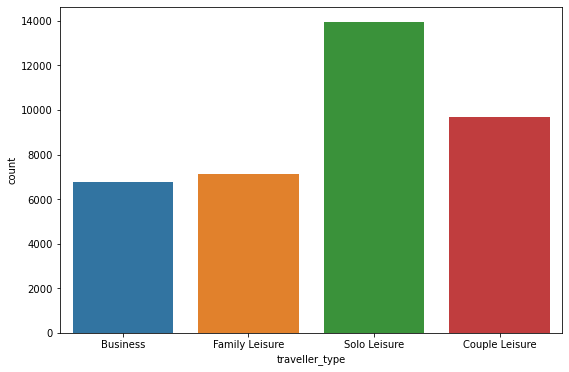

In [15]:

#setting the figure size and plotting the graph
plt.figure(figsize=(9,6))
sns.countplot(df['traveller_type'])



From above plot

    Travelling type of Solo Leisure has more ratings



## 2) Which type of Cabin has more recommendation?

<AxesSubplot:xlabel='cabin', ylabel='count'>

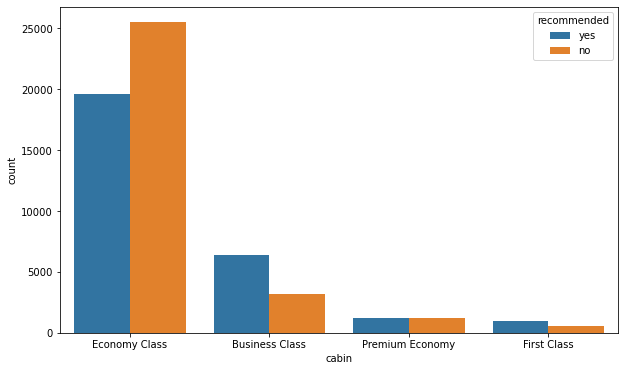

In [16]:
#setting the figure size and plotting the graph
plt.figure(figsize=(10,6))
sns.countplot(df['cabin'],hue=df['recommended'])



On the basis of graph -

    Economy class has highest recommendation with bad reviews.

    Business class has second most recommended cabin type with good reviews.

    premium economy has equal reviews.

    first class is least recommend cabin type with good reviews.



## 3) Is it Solo Leisure worth for Money?

<AxesSubplot:xlabel='traveller_type', ylabel='value_for_money'>

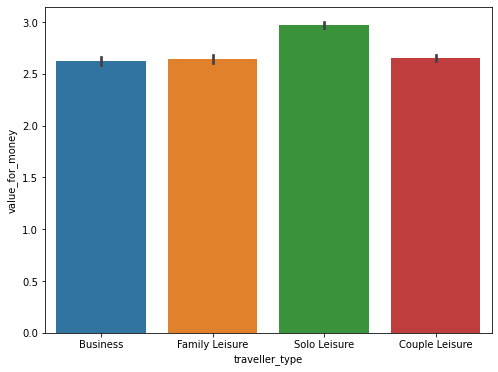

In [17]:


#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=df['traveller_type'],y=df['value_for_money'])
     



From above plot

Yes,Travelling Type of Solo Leisure worth of Money compare to other type of travelling.


### 4) In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

In [18]:
avg_rating=df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
avg_rating

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<AxesSubplot:xlabel='cabin'>

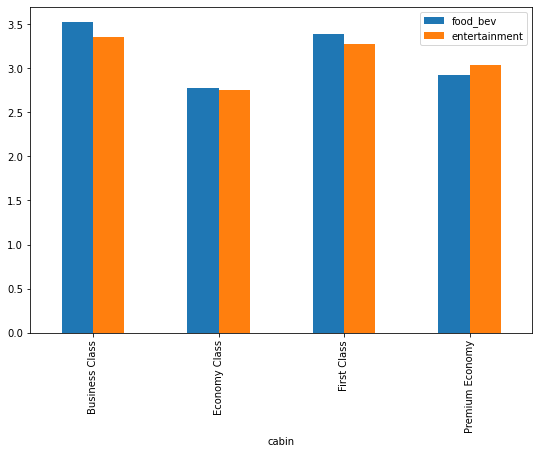

In [19]:
plt.rcParams['figure.figsize']=(9,6)
avg_rating.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")



From above plot

In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.


## 5) Which cabin type has overall service ratings?

<AxesSubplot:xlabel='cabin', ylabel='overall'>

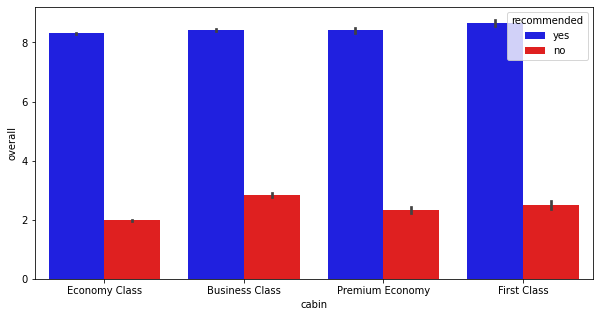

In [20]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.barplot(df.cabin, df.overall, hue = df['recommended'], palette= ['blue','red'])

If the trip is rated above 8 for overall section, the trip is most likely be recommended by the travellers.

If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type


## 6)Which airline made highest trips?

In [80]:
#get the number of trips each airline make.
airlines_trip = df['airline'].value_counts()
airlines_trip[:10]

Spirit Airlines            2871
American Airlines          2846
United Airlines            2774
British Airways            2731
Emirates                   1763
China Southern Airlines    1719
Frontier Airlines          1622
Ryanair                    1550
Delta Air Lines            1535
Turkish Airlines           1478
Name: airline, dtype: int64

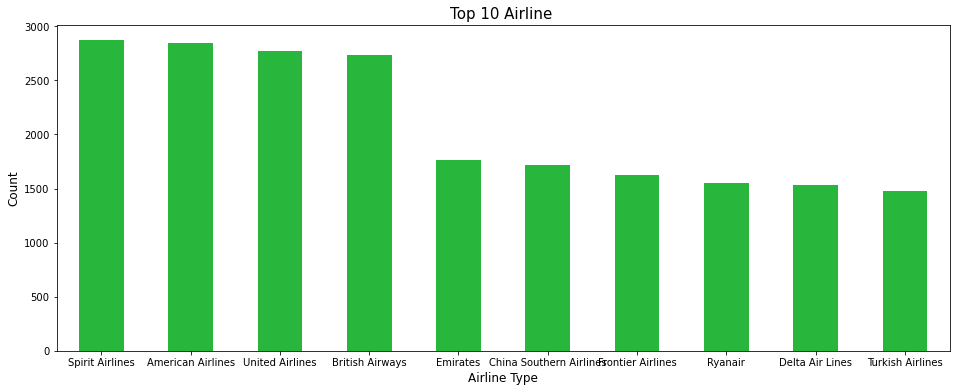

In [22]:


# Visualize the top 10 airlines with most trips
plt.figure(figsize=(16,6))
airlines_trip[:10].plot(kind='bar',color = '#29b63c')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

     




We have observed that the top 5 airlines with most trips are-

    Spirit Airlines

    American Airlines

    United Airlines

    British Airways
    
    Emirates


## 7) Comparison of all independent variable/features?


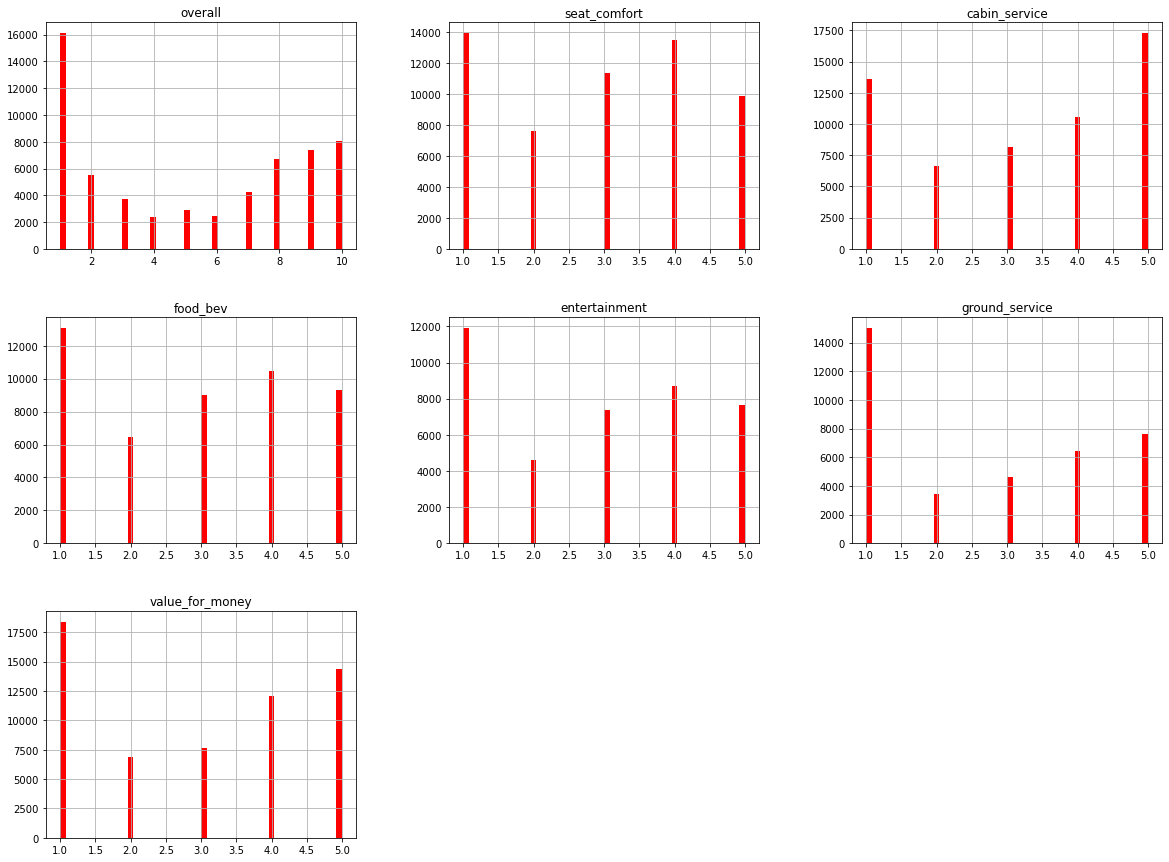

In [23]:

#frequency distribution using histgram
df.hist(bins=50, figsize=(20,15),color = 'red')
plt.show()



From above plot

    The overall feature ratings of 1 to 2 occur more frequently.

From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

    From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

    The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

    The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

    From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.



In [24]:
# Count missing value and percentage
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

print('Missing Data Count')
print()
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print()
print('Missing Data Percentage %')
print()
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count

aircraft           42696
ground_service     24015
date_flown         23750
route              23671
traveller_type     23644
entertainment      20954
food_bev           12843
seat_comfort        4973
cabin_service       4944
cabin               2479
value_for_money     1857
overall             1783
recommended         1423
customer_review        1
review_date            1
author                 1
airline                1
dtype: int64
----------------------------------------------------------------------------------------------------

Missing Data Percentage %

aircraft           69.78
ground_service     39.25
date_flown         38.82
route              38.69
traveller_type     38.64
entertainment      34.25
food_bev           20.99
seat_comfort        8.13
cabin_service       8.08
cabin               4.05
value_for_money     3.04
overall             2.91
recommended         2.33
customer_review     0.00
review_date         0.00
author              0.00
airline      

In [25]:
#checking the number of unique aircrafts
df.aircraft.nunique()

2088

In [26]:
df = df.drop(['aircraft'],axis = 1)

In [27]:
#droping the columns from data which are not for our use
data = df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)
data.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


In [28]:

#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [29]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [30]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(data,col)

In [31]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [32]:
#Looping the null value column
for col in high_null:
  median_imputation(data,col)

In [33]:
data.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


In [34]:
#Remove recommended null value row
data.dropna(subset=['recommended'],inplace=True)

In [35]:
data['traveller_type'].fillna(method="ffill",inplace=True)

In [36]:
data['cabin'].fillna(data['cabin'].mode().values[0],inplace=True)

In [37]:
data.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [38]:
#Checking the new null value percentage
def show_missing(data):
    missing = data.columns[data.isnull().any()].tolist()
    print('Missing Data Count')
    print()
    print(data.isnull().sum().sort_values(ascending = False))
    print('--'*50)
    print()
    print('Missing Data Percentage %')
    print()
    print(round(data.isnull().sum().sort_values(ascending = False)/len(df)*100,2))
    




In [39]:

show_missing(data)

Missing Data Count

airline            0
overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64
----------------------------------------------------------------------------------------------------

Missing Data Percentage %

airline            0.0
overall            0.0
traveller_type     0.0
cabin              0.0
seat_comfort       0.0
cabin_service      0.0
food_bev           0.0
entertainment      0.0
ground_service     0.0
value_for_money    0.0
recommended        0.0
dtype: float64



## Converting target as categorical data into numerical data: 'Label Encoding'

In [40]:
data['recommended'].replace({'yes':1,'no':0},inplace=True)

In [41]:
data.head(3)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0


<AxesSubplot:>

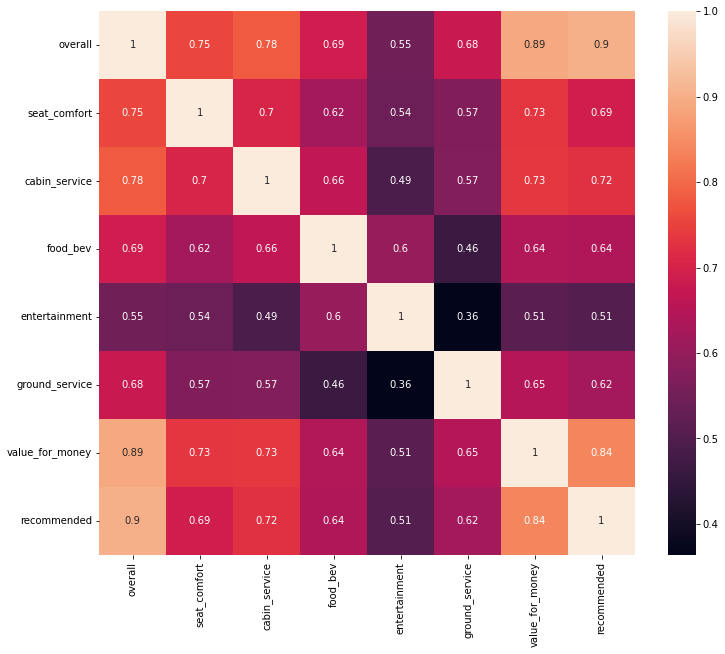

In [42]:


plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)
     



Correlation plot

Drop overall column as it has highest correlation value than others.


In [43]:
data.columns

Index(['airline', 'overall', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended'],
      dtype='object')

In [44]:
data.drop(["overall"], axis = 1, inplace = True)
data.drop(["airline"], axis = 1, inplace = True)

In [45]:
data.head(2)

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0


In [46]:
#separating the dependent and independent variables
y = data['recommended']
x = data.drop(columns = 'recommended')

## One Hot Encoding

In [47]:
x = pd.get_dummies(x)

In [48]:
x.head(2)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0


In [49]:
#confusion matrix

def my_confusion_matrix(y_test, y_pred, plt_title):
    
    cm=confusion_matrix(y_test, y_pred)
    
    print(classification_report(y_test, y_pred))
    
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

## Splitting Train and Test Data

In [50]:

#train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

In [51]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


## Model-1:Fitting Logistic Regression

In [52]:
#logistic regression fitting 
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [53]:
log_reg.score(x_test,y_test)

0.9324019074709278

In [54]:
y_pred = log_reg.predict(x_test)

Logistic Regression Accuracy Score:  0.9324019074709278
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



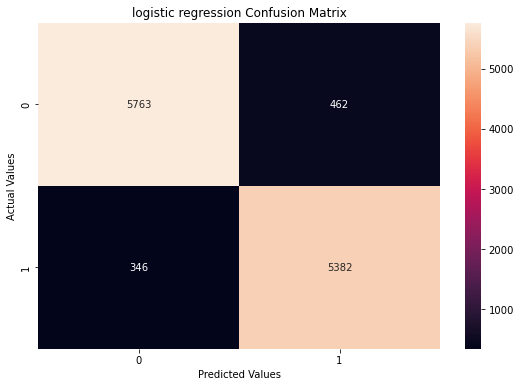

In [55]:
print('Logistic Regression Accuracy Score: ',accuracy_score(y_test,y_pred))
cm_rfc=my_confusion_matrix(y_test, y_pred, 'logistic regression Confusion Matrix')


## Model-2:Fitting Decision Tree Classifer

In [56]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(x_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(x_test,y_test))
     

Training Accuracy of Decision Tree Model is 0.9745440093708166
Testing Accuracy of Decision Tree Model is 0.9170082824395549


In [58]:
y_pred = tree_classify.predict(x_test)

Decision tree Classifier Accuracy Score:  0.9170082824395549
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



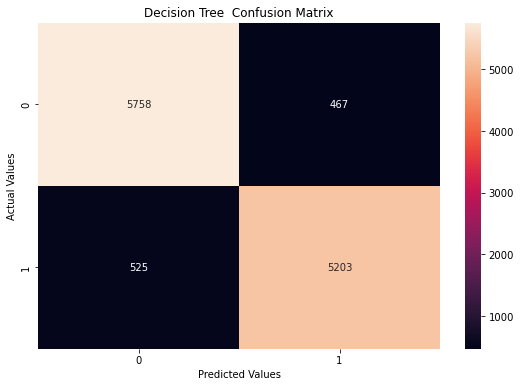

In [59]:
print('Decision tree Classifier Accuracy Score: ',accuracy_score(y_test,y_pred))
cm_rfc=my_confusion_matrix(y_test, y_pred, 'Decision Tree  Confusion Matrix')

## Model-3:Fitting Random Forest

In [60]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
random_forest.score(x_test,y_test)

0.9290554672467163

In [62]:
y_pred = random_forest.predict(x_test)

Random Forest Classifier Accuracy Score:  0.9290554672467163
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6225
           1       0.93      0.92      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



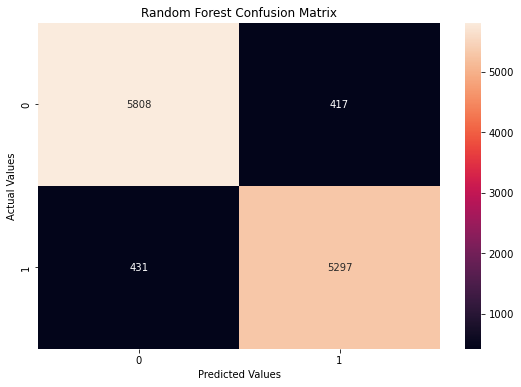

In [63]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred))
cm_rfc=my_confusion_matrix(y_test, y_pred, 'Random Forest Confusion Matrix')

## Model-4:K-Nearest Neighbour

In [64]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred = k_neighbor.predict(x_test)

In [66]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train, y_train)
print(train_accuracy)
# Compute accuracy on the test set
test_accuracy = k_neighbor.score(x_test, y_test) 
print(test_accuracy)

0.9487951807228916
0.9300593993139797


KNN Classifier Accuracy Score:  0.9300593993139797

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6225
           1       0.93      0.93      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



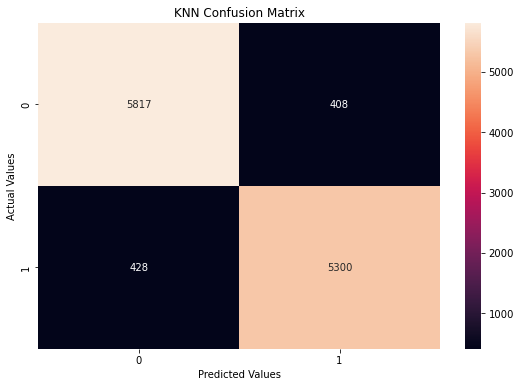

In [67]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred))
print()

cm_rfc=my_confusion_matrix(y_test, y_pred, 'KNN Confusion Matrix')

## Model-5:Support Vector Machine

In [68]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

SVC(kernel='linear')

In [69]:
#score for support vector machine
support_vector.score(x_test, y_test)

0.9318162804316907

In [70]:
y_pred = support_vector.predict(x_test)   

SVM Classifier Accuracy Score:  0.9318162804316907

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



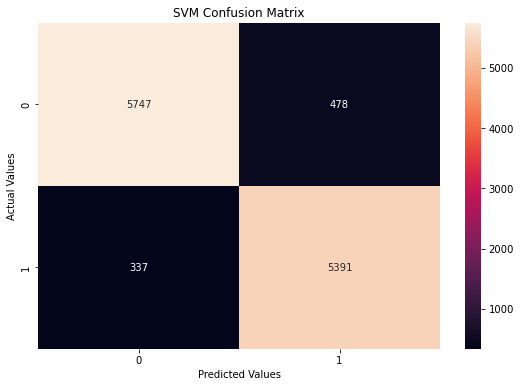

In [71]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred))
print()

cm_rfc=my_confusion_matrix(y_test, y_pred, 'SVM Confusion Matrix')

## Model-6:Naïve Bayes Classifier

In [72]:
#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [73]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

0.9177543507362784

In [74]:
# making predictions on the testing set
y_pred = naive_bayes.predict(x_test)

Gaussian NB Classifier Accuracy Score:  0.910901029030369

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6225
           1       0.91      0.90      0.91      5728

    accuracy                           0.91     11953
   macro avg       0.91      0.91      0.91     11953
weighted avg       0.91      0.91      0.91     11953



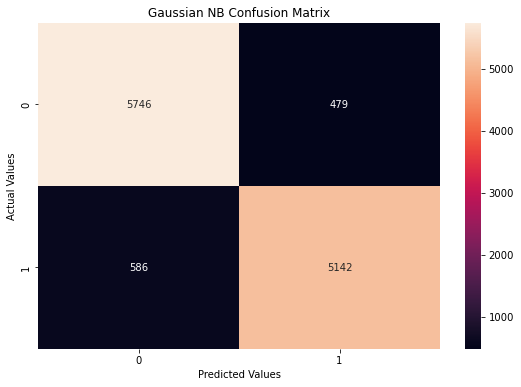

In [75]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_test,y_pred))
print()
cm_rfc=my_confusion_matrix(y_test, y_pred, 'Gaussian NB Confusion Matrix')


## Accuracy Metrics for All Fitted Model

In [76]:

#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics


In [77]:

models=[log_reg,tree_classify,random_forest,k_neighbor,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model ','Random Forest Model ','k_neighbor','support vector','naive bayes']


In [78]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print({name[model_]})
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

{'Logistic Regression Model'}

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.938964    0.932402
1  Precsion_Score     0.928162    0.920945
2    Recall_Score     0.944959    0.939595
3   Roc_Auc_Score     0.939237    0.932689

{'Decision Tree Model '}

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974544    0.917008
1  Precsion_Score     0.977952    0.917637
2    Recall_Score     0.968373    0.908345
3   Roc_Auc_Score     0.974263    0.916662

{'Random Forest Model '}

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974544    0.929055
1  Precsion_Score     0.970768    0.927021
2    Recall_Score     0.975928    0.924756
3   Roc_Auc_Score     0.974607    0.928884

{'k_neighbor'}

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.948795    0.930059
1  Precsion_Score     0.947294    0.928521
2    Recall_Score     0.945047    0.925279
3   Roc_Auc_Score     0.948625    0.929869

{'support vector'}

          Metrics

    
<h2 style="color: #bf0e23 " >Conclusion</h2>

<h3 style="color: #29b63c " >The Models used for this Classsification problem are</h3>
<h4>Logistic Regression Model<br><br>
    Decision Tree Model<br><br>
    Random Forest Model<br><br>
    K-Nearest Neighbor Model<br><br>
    Support Vector Machine Model <br><br>
    Naive Bayes </h4>

    We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbor ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

    Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given first priority , Accuray is given second priority , and ROC AUC is given third priority.

    We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.* We can conclude that LogisticRegression gives the best model.

    model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.


